In [2]:
from sklearn.decomposition import PCA, IncrementalPCA, 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_svmlight_file
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
%matplotlib inline

In [19]:
data=np.random.randn(100,3)

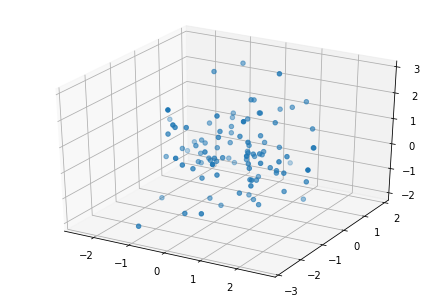

In [22]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(data[:,0],data[:,1],data[:,2])

In [23]:
pca=PCA(n_components=2)
X2D=pca.fit_transform(data)

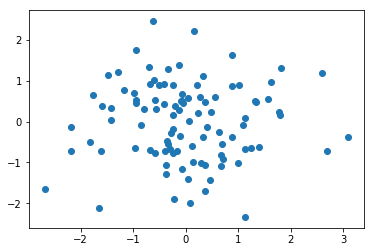

In [24]:
plt.scatter(X2D[:,0],X2D[:,1])

In [25]:
pca.components_

array([[-0.20576024,  0.52573221,  0.82538983],
       [ 0.97811814,  0.13701698,  0.15656067]])

In [26]:
pca.explained_variance_ratio_

array([0.40982697, 0.33427216])

In [32]:
pca=PCA()
pca.fit(data)
ratio=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(ratio>=.95)+1
d

3

In [33]:
pca.explained_variance_ratio_

array([0.40982697, 0.33427216, 0.25590087])

In [34]:
ratio

array([0.40982697, 0.74409913, 1.        ])

In [35]:
np.argmax(ratio>=.95)

2

In [37]:
data=load_svmlight_file('../datasets/nt-demo/demo-g1-v2.txt')
X,y=data[0],data[1]

In [52]:
X_s,y_s=resample(X,y,n_samples=10000,replace=False,random_state=42)

In [53]:
pca=PCA(n_components=0.95)
X_r=pca.fit_transform(X_s.toarray())

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X_r,y_s,test_size=.3,random_state=1)

In [57]:
rf_clf=RandomForestClassifier(n_estimators=200,max_depth=20,verbose=1,n_jobs=-1)
rf_clf.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.7s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [5]:
from sklearn.metrics import precision_score, precision_recall_curve, recall_score, roc_curve, auc, confusion_matrix

def model_eva(model,X_test,y_test):
    y_test_pred_proba=model.predict_proba(X_test)
    y_test_pred=model.predict(X_test)
    fpr,tpr,threshold=roc_curve(y_test,y_test_pred_proba[:,0],pos_label=1)
    print('precision_score:',precision_score(y_test,y_test_pred))
    print('auc:',auc(fpr,tpr))
    print(confusion_matrix(y_test,y_test_pred).T)
    plt.plot(fpr,tpr)
    plt.xlabel('fpt')
    plt.ylabel('tpr')
    plt.title('RoC')
    print(np.unique(y_test,return_counts=True))
    print(np.unique(y_test_pred,return_counts=True))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s finished


precision_score: 0.9810903732809431
auc: 0.9969512624632079
[[3995   77]
 [  75 2853]]
(array([1., 2.]), array([4070, 2930]))
(array([1., 2.]), array([4072, 2928]))


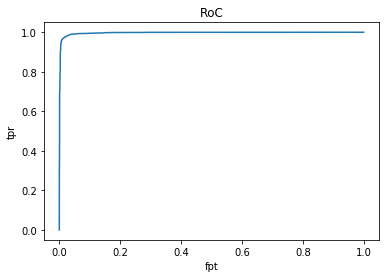

In [59]:
model_eva(rf_clf,X_train,y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s finished


precision_score: 0.6790123456790124
auc: 0.6993019678411796
[[1265  598]
 [ 447  690]]
(array([1., 2.]), array([1712, 1288]))
(array([1., 2.]), array([1863, 1137]))


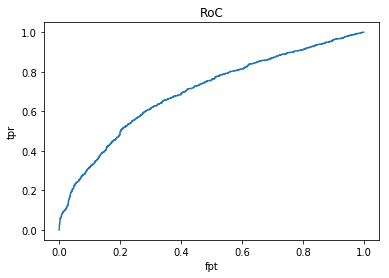

In [60]:
model_eva(rf_clf,X_test,y_test)

In [6]:
def model_eva_multi(model,X_test,y_test):
    y_test_pred=model.predict(X_test)
    print('precision_score:',precision_score(y_test,y_test_pred,average='macro'))
    print(confusion_matrix(y_test,y_test_pred).T)
    print(np.unique(y_test,return_counts=True))
    print(np.unique(y_test_pred,return_counts=True))

In [34]:
data = load_svmlight_file('../datasets/nt-demo/demo-g3-v2.txt')
X,y=data[0],data[1]
X_s,y_s=resample(X,y,n_samples=80000,replace=False)

In [14]:
pca=PCA(svd_solver='randomized')
X_r=pca.fit(X_s.toarray())

In [15]:
sum_ratio=np.cumsum(pca.explained_variance_ratio_)
index = np.argmax(sum_ratio>=.95)+1
index

51

In [35]:
new_pca=PCA(n_components=51,svd_solver='randomized')
X_r=new_pca.fit_transform(X_s.toarray())

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X_r,y_s,test_size=.3,random_state=1)

In [37]:
rf_clf=RandomForestClassifier(n_estimators=200,max_depth=20,verbose=1,n_jobs=-1)
rf_clf.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   42.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [39]:
model_eva_multi(rf_clf,X_train,y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s


precision_score: 0.881853491066292
[[2247  195  192  158  147  105  103   80   57   40   67]
 [  28 1568   21   20   17   23   21   14   10    6    8]
 [  99  103 4094  137  143  111  127   76   61   48   64]
 [  45   55   91 5179  101   84   73   48   44   41   46]
 [  75   76  115  164 6266  127  126   92   67   47   67]
 [  45   42   66  108   95 6124   98   73   68   55   45]
 [  37   33   61   70   67   72 5078   58   50   30   47]
 [  10   20   16   23   32   29   32 4326   28   25   21]
 [   4    5   10   15   11   16   19   11 3522   12    6]
 [   5    3   10   10   10    5   11   13   12 3317    9]
 [  48   37   87   82  105  142  158  182  152  149 7619]]
(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]), array([2643, 2137, 4763, 5966, 6994, 6838, 5846, 4973, 4071, 3770, 7999]))
(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]), array([3391, 1736, 5063, 5807, 7222, 6819, 5603, 4562, 3631, 3405, 8761]))


[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    2.3s finished


In [40]:
model_eva_multi(rf_clf,X_test,y_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s


precision_score: 0.147604532688107
[[ 305  189  198  165  134  132   73   57   38   40   60]
 [  69   47   53   47   44   39   31   31   22   17   19]
 [ 153  140  235  284  232  212  145  116   82   59  104]
 [ 113  119  290  393  420  342  244  182  136  107  166]
 [ 165  148  344  508  611  544  446  343  226  184  276]
 [ 143   98  314  382  511  517  407  297  248  210  323]
 [  59   59  134  230  252  241  231  186  142  126  215]
 [  36   23   74  140  159  167  140  126   94   82  176]
 [  20   14   54   71   75   72   78   88   66   58  102]
 [   7   16   47   48   61   74   73   60   65   44  101]
 [ 117   84  288  325  503  588  565  634  630  688 1863]]
(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]), array([1187,  937, 2031, 2593, 3002, 2928, 2433, 2120, 1749, 1615, 3405]))
(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]), array([1391,  419, 1762, 2512, 3795, 3450, 1875, 1217,  698,  596, 6285]))


[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.9s finished


In [41]:
rf_clf=RandomForestClassifier(n_estimators=300,max_depth=15,verbose=1,n_jobs=-1,max_features=10,min_samples_leaf=3)
rf_clf.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.1min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [42]:
model_eva_multi(rf_clf,X_train,y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.1s


precision_score: 0.7612426556399092
[[1551  391  352  283  260  251  192  149   90   65  130]
 [   9  559   10   10    5    2   10    8    5    5    5]
 [ 176  216 2983  227  203  205  211  133  115   89   96]
 [ 122  152  184 4259  146  164  185  148  131  144  100]
 [ 272  304  413  363 5667  352  410  377  315  265  237]
 [ 166  178  237  216  141 5253  207  216  203  245  139]
 [  48   68   88   90   69   67 3980   73   77   66   50]
 [  23   26   20   29   23   21   26 3207   34   43   12]
 [   6    5    7    7    5    9    4    6 2413   11    2]
 [   3    3    6    3    3    4    3    6    5 2131    2]
 [ 267  235  463  479  472  510  618  650  683  706 7226]]
(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]), array([2643, 2137, 4763, 5966, 6994, 6838, 5846, 4973, 4071, 3770, 7999]))
(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]), array([ 3714,   628,  4654,  5735,  8975,  7201,  4676,  3464,  2475,
        2169, 12309]))


[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    1.7s finished


In [43]:
model_eva_multi(rf_clf,X_test,y_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s


precision_score: 0.15593948602042423
[[ 363  238  243  170  141  141   84   69   47   37   67]
 [  23   13   19   11    9    9    3    7    2    5    5]
 [ 145  118  207  235  197  162  113   84   56   39   81]
 [ 106  114  291  404  388  322  229  163  109   87  139]
 [ 216  183  448  658  731  650  508  402  278  219  295]
 [ 136   94  302  420  562  578  461  362  291  222  332]
 [  32   42   83  146  183  183  164  140   99  104  124]
 [  12    7   40   62   92   97   89   80   47   45   93]
 [   2    4   17   22   26   30   33   19   26   21   37]
 [   1   10   11   17   16   23   22   19   19   20   45]
 [ 151  114  370  448  657  733  727  775  775  816 2187]]
(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]), array([1187,  937, 2031, 2593, 3002, 2928, 2433, 2120, 1749, 1615, 3405]))
(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]), array([1600,  106, 1437, 2352, 4588, 3760, 1300,  664,  237,  203, 7753]))


[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    1.3s finished


In [44]:
# xgb_clf = xgb.XGBClassifier(
#                  colsample_bytree=0.2,
#                  gamma=0.0,
#                  learning_rate=0.01,
#                  max_depth=6,
#                  min_child_weight=1.5,
#                  n_estimators=100,                                                                  
#                  reg_alpha=0.9,
#                  reg_lambda=0.6,
#                  subsample=0.2,
#                  seed=42,
#                  silent=1)
xgb_clf = xgb.XGBClassifier(
                 learning_rate=0.01,
                 max_depth=6,
                 n_estimators=1000,                                                                  
                 seed=42,
                 silent=1)
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=1,
       subsample=1)

In [45]:
model_eva_multi(rf_clf,X_train,y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.2s


precision_score: 0.7612426556399092
[[1551  391  352  283  260  251  192  149   90   65  130]
 [   9  559   10   10    5    2   10    8    5    5    5]
 [ 176  216 2983  227  203  205  211  133  115   89   96]
 [ 122  152  184 4259  146  164  185  148  131  144  100]
 [ 272  304  413  363 5667  352  410  377  315  265  237]
 [ 166  178  237  216  141 5253  207  216  203  245  139]
 [  48   68   88   90   69   67 3980   73   77   66   50]
 [  23   26   20   29   23   21   26 3207   34   43   12]
 [   6    5    7    7    5    9    4    6 2413   11    2]
 [   3    3    6    3    3    4    3    6    5 2131    2]
 [ 267  235  463  479  472  510  618  650  683  706 7226]]
(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]), array([2643, 2137, 4763, 5966, 6994, 6838, 5846, 4973, 4071, 3770, 7999]))
(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]), array([ 3714,   628,  4654,  5735,  8975,  7201,  4676,  3464,  2475,
        2169, 12309]))


[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    1.9s finished


In [46]:
model_eva_multi(rf_clf,X_test,y_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s


precision_score: 0.15593948602042423
[[ 363  238  243  170  141  141   84   69   47   37   67]
 [  23   13   19   11    9    9    3    7    2    5    5]
 [ 145  118  207  235  197  162  113   84   56   39   81]
 [ 106  114  291  404  388  322  229  163  109   87  139]
 [ 216  183  448  658  731  650  508  402  278  219  295]
 [ 136   94  302  420  562  578  461  362  291  222  332]
 [  32   42   83  146  183  183  164  140   99  104  124]
 [  12    7   40   62   92   97   89   80   47   45   93]
 [   2    4   17   22   26   30   33   19   26   21   37]
 [   1   10   11   17   16   23   22   19   19   20   45]
 [ 151  114  370  448  657  733  727  775  775  816 2187]]
(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]), array([1187,  937, 2031, 2593, 3002, 2928, 2433, 2120, 1749, 1615, 3405]))
(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]), array([1600,  106, 1437, 2352, 4588, 3760, 1300,  664,  237,  203, 7753]))


[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.8s finished
